<a href="https://colab.research.google.com/github/shreshhhth/Twitter-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
# authentication
api_key = "JdnW9KDsutzjlj4Fp1rGIdrRP"
api_key_secret = "97XIWdW0iLNHJiLeoumHLeleuymVnNNqaKeSsO92H3oSA0uZlc"

access_token = "1469341136078577665-NXGvc3HEzitqc6fDgmiIFoMyB6uYU7"
access_token_secret = "XTwYrg3xMzCB25iN8z3smfGD95D7oPGyJt21U1xSpDJbk"

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [42]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
limit = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=keyword).items(limit)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []


Please enter keyword or hashtag to search: local
Please enter how many tweets to analyze: 500


In [43]:
for tweet in tweets:
 
 print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
    negative_list.append(tweet.text)
    negative += 1
 elif pos > neg: 
         positive_list.append(tweet.text)
         positive += 1
 elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, limit)
negative = percentage(negative, limit)
neutral = percentage(neutral, limit)
polarity = percentage(polarity, limit)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

RT @ChinasaNworu: The #US govt should not focus on #Nigeria local election, rather they should focus on #Nigeria govt human rights abuses ,…
RT @LeoncePontillie: I have an appointment coming up at my local oncologist office to check my iron levels &amp; possibly get more iron infusio…
But the existentialist drama queen has to get in her word:

“?קצתי בחיי… למה לי חיים” — I am fed up with my life be… https://t.co/mLfJqsXUff
RT @india_jab: India :Post Vaccination death #17320
@awakenindiamov 
Kerala

Jayachandran Nair, BJP incharge of ward and local panchayat, d…
03:04:02 #pré_hospitalar local: Sao José, Goias, #Santa_cruz_do_sul - transporte de vítima acamada em casa
RT @india_jab: India :Post Vaccine death #17241
@awakenindiamov
West Bengal

Jhuma Goswami, district in charge of BJP mahila morcha, Bishnu…
Women statistically live longer than men. At some point in her life, a woman will likely be the manager of her fina… https://t.co/tCuRuToEl4
RT @hutch472: Today, I witnessed an elderly

In [44]:
#Number of Tweets (Total, Positive, Negative, Neutral)

tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  500
positive number:  186
negative number:  110
neutral number:  204


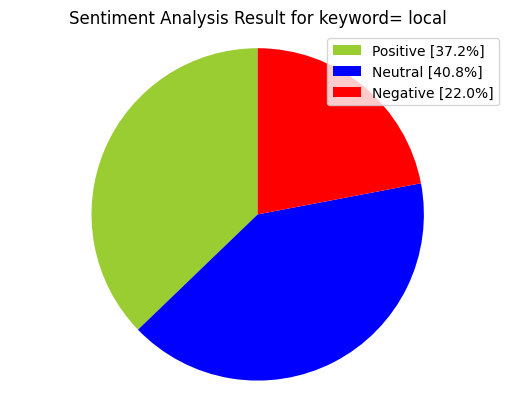

In [45]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]' ]
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [46]:
tweet_list


,0
0,RT @ChinasaNworu: The #US govt should not focu...
1,RT @LeoncePontillie: I have an appointment com...
2,But the existentialist drama queen has to get ...
3,RT @india_jab: India :Post Vaccination death #...
4,"03:04:02 #pré_hospitalar local: Sao José, Goia..."
...,...
495,水沢10R レックススタッド特別\n予測結果\n◎ピシュマニエ\n○シュゼット\n▲タイセイ...
496,RT @Jenny_1884: Yet another Turkish Barbers ap...
497,RT @Scribulatora: Local man admits to not read...
498,A regulatory governance solution powered by pu...


In [47]:
#CLEANING TWEETS TO ANALYSE SENTIMENTS

tweet_list.drop_duplicates(inplace = True)
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

In [48]:
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @ChinasaNworu: The #US govt should not focu...,# # ...
1,RT @LeoncePontillie: I have an appointment com...,...
2,But the existentialist drama queen has to get ...,...
3,RT @india_jab: India :Post Vaccination death #...,: # \n \n ...
4,"03:04:02 #pré_hospitalar local: Sao José, Goia...",": : # é_ : é, ..."
5,RT @india_jab: India :Post Vaccine death #1724...,: # \n \n ...
6,Women statistically live longer than men. At s...,. ...
7,"RT @hutch472: Today, I witnessed an elderly ge...",", ..."
8,Michigan's plan for 35% renewable energy by 20...,' % ...
9,@Mylvie_ @SonicBeSoujaBoi That is an inferior ...,"_ , ..."


SENTIMENT ANALYSIS


In [49]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
    tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
      tw_list.loc[index, 'sentiment'] = "positive"
 else:
      tw_list.loc[index, 'sentiment'] = "neutral"
 tw_list.loc[index, 'neg'] = neg
 tw_list.loc[index, 'neu'] = neu
 tw_list.loc[index, 'pos'] = pos
 tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @ChinasaNworu: The #US govt should not focu...,# # ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
1,RT @LeoncePontillie: I have an appointment com...,...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
2,But the existentialist drama queen has to get ...,...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
3,RT @india_jab: India :Post Vaccination death #...,: # \n \n ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
4,"03:04:02 #pré_hospitalar local: Sao José, Goia...",": : # é_ : é, ...",0.0,0.0,neutral,0.0,1.0,0.0,0.0
5,RT @india_jab: India :Post Vaccine death #1724...,: # \n \n ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
6,Women statistically live longer than men. At s...,. ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
7,"RT @hutch472: Today, I witnessed an elderly ge...",", ...",0.0,0.0,neutral,0.0,0.0,0.0,0.0
8,Michigan's plan for 35% renewable energy by 20...,' % ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
9,@Mylvie_ @SonicBeSoujaBoi That is an inferior ...,"_ , ...",0.0,0.0,neutral,0.0,0.0,0.0,0.0


In [50]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

TOTAL PERCENTAGE

In [51]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,424,99.76
negative,1,0.24


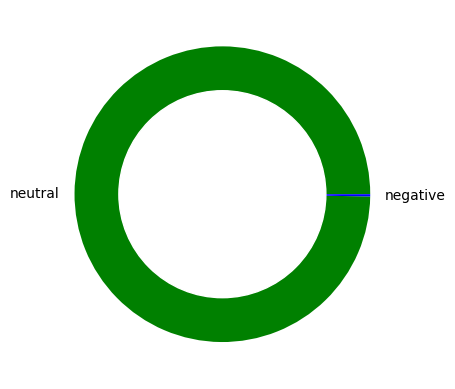

In [52]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()